In [41]:
import pandas as pd
import numpy as np
import seaborn as sys
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,accuracy_score

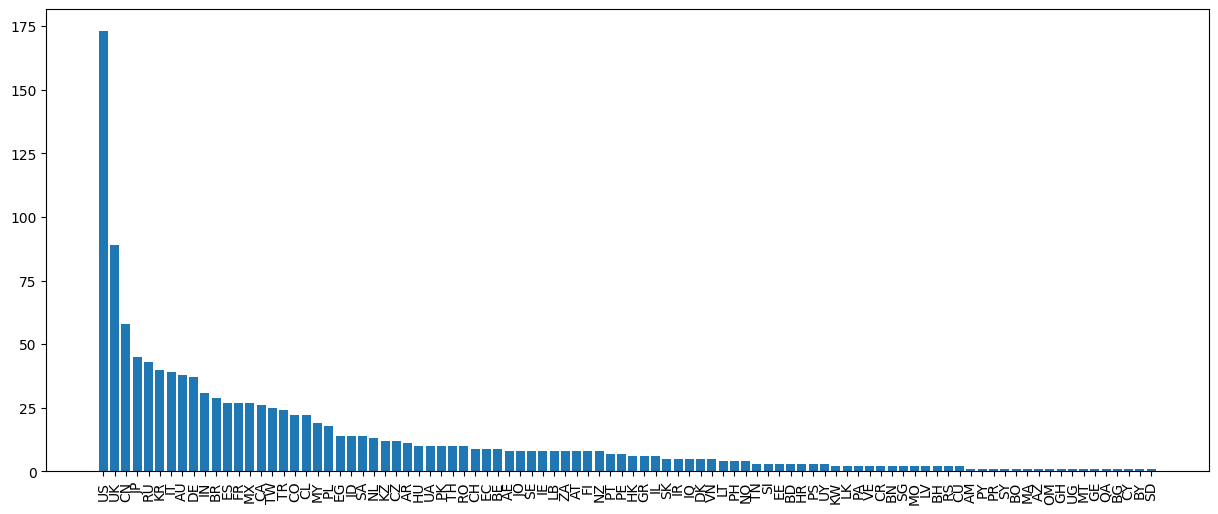

In [42]:
data = pd.read_csv("DataSets/2024 QS World University Rankings 1.1 (For qs.com).csv")

data = data[data["FOCUS"] != "focus"]

data = data.dropna(how="any",axis=0)

data["2024 RANK"]=data["2024 RANK"].str.replace("="," ")

data["2024 RANK"]=data["2024 RANK"].str.replace("+"," ")

data["2023 RANK"]=data["2023 RANK"].str.replace("="," ")

data["2023 RANK"]=data["2023 RANK"].str.replace("+"," ")

plt.figure(figsize=(15,6))

plt.bar(data["Country Code"].value_counts().index,data["Country Code"].value_counts())

plt.xticks(rotation="vertical")

plt.show()

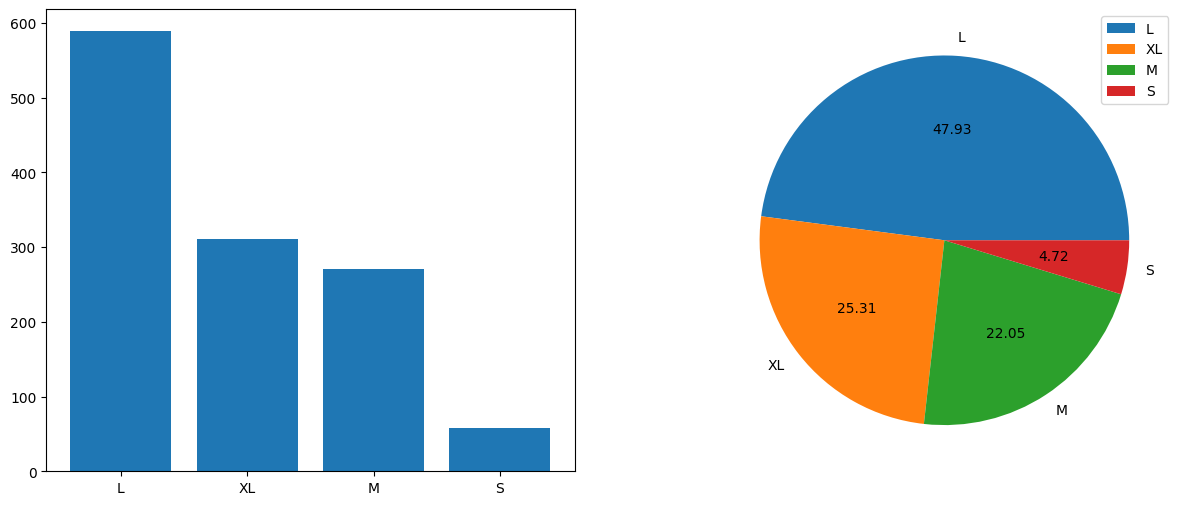

In [43]:
def showbar(colname):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)

    plt.bar(data[colname].value_counts().index,data[colname].value_counts())

    plt.subplot(1,2,2)

    plt.pie(data[colname].value_counts(),labels=data[colname].value_counts().index,autopct="%.2f")

    plt.legend()

    plt.show()


showbar("SIZE")

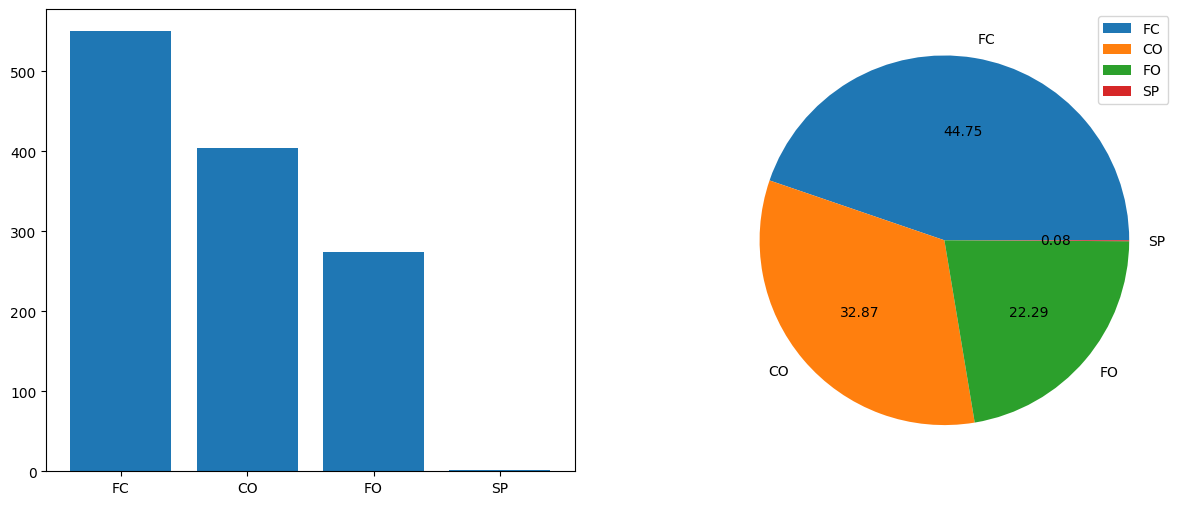

In [44]:
showbar("FOCUS")

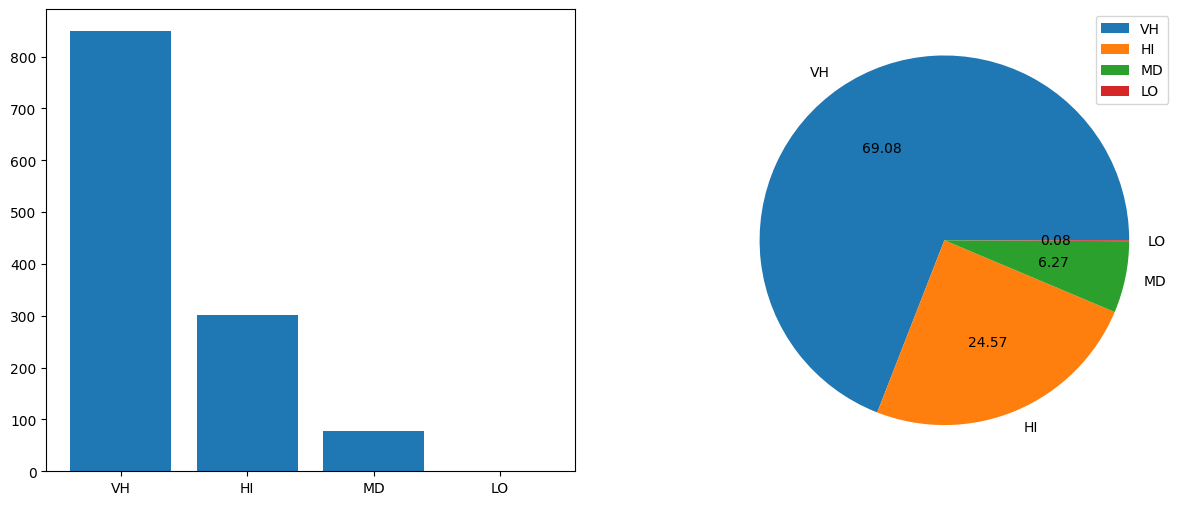

In [45]:
showbar("RES.")

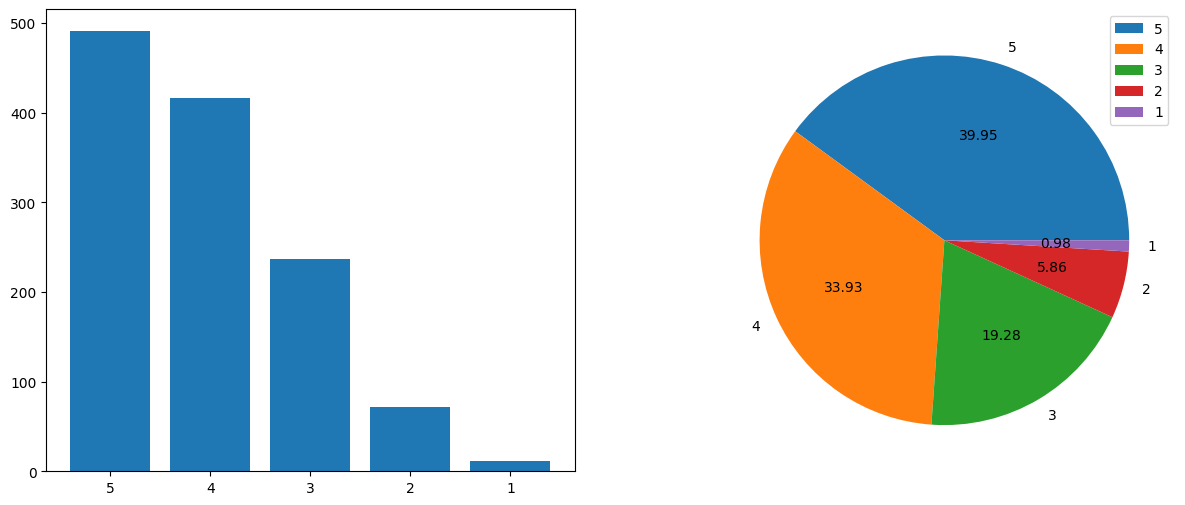

In [46]:
showbar("AGE")

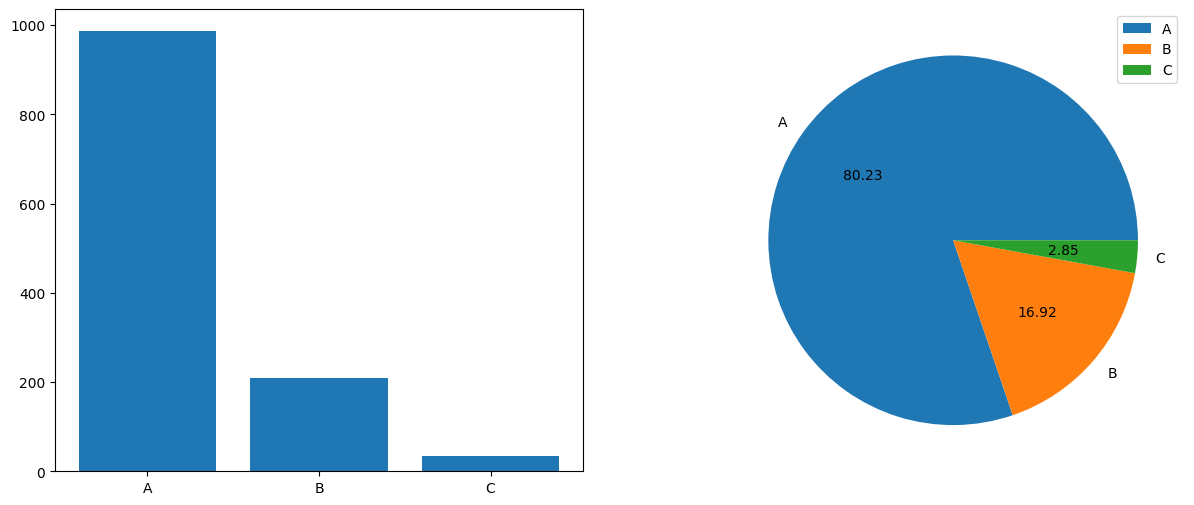

In [47]:
showbar("STATUS")

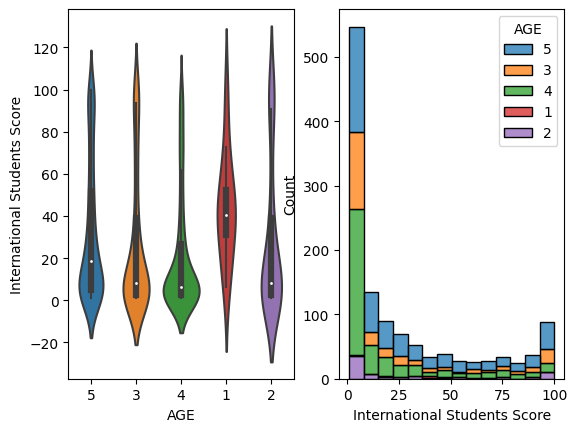

In [48]:
for i in ["Academic Reputation Score","Employer Reputation Score","Faculty Student Score","Citations per Faculty Score","International Faculty Score","International Students Score","Employment Outcomes Score","Sustainability Score"]:  
    data[i] = data[i].astype("float64")
def showvil(colname,colname2):
    plt.subplot(1,2,1)    

    sys.violinplot(y=colname,x=colname2,data=data)

    plt.subplot(1,2,2)

    sys.histplot(x=colname,hue=colname2,multiple="stack",data=data)

    plt.show()
    
showvil("International Students Score","AGE")

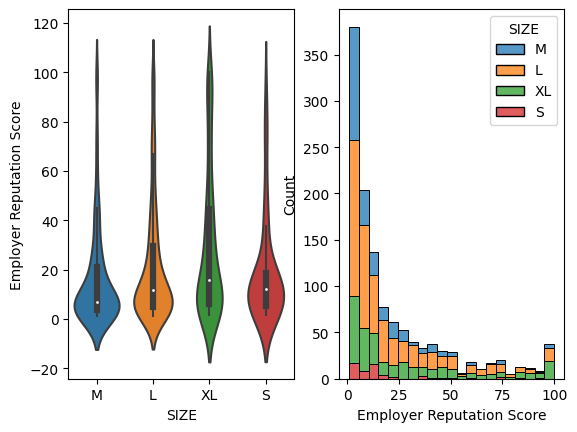

In [49]:
showvil("Employer Reputation Score","SIZE")

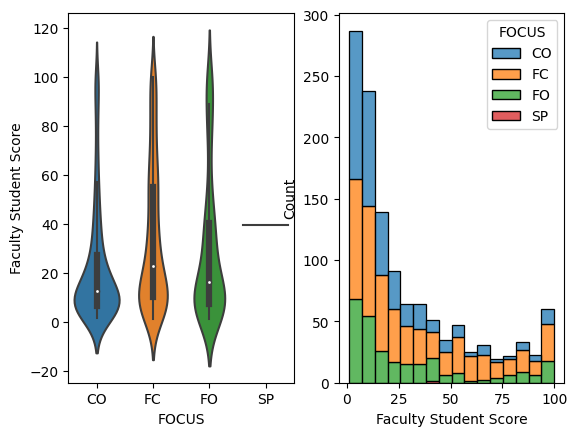

In [50]:
showvil("Faculty Student Score","FOCUS")

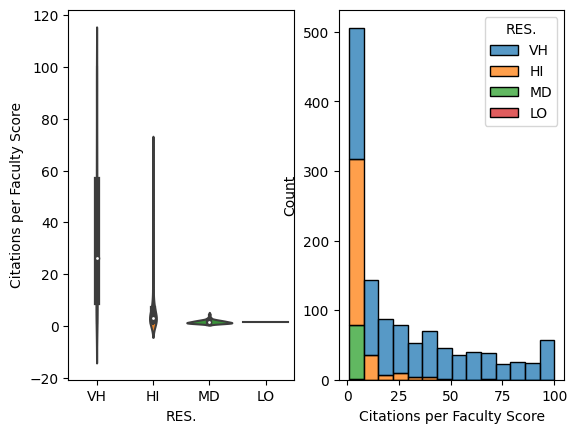

In [51]:
showvil("Citations per Faculty Score","RES.")

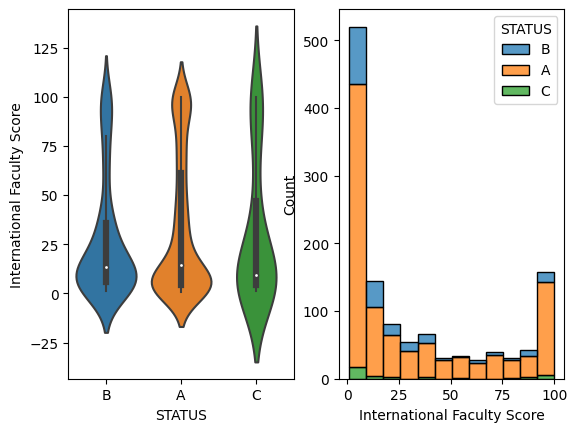

In [52]:
showvil("International Faculty Score","STATUS")

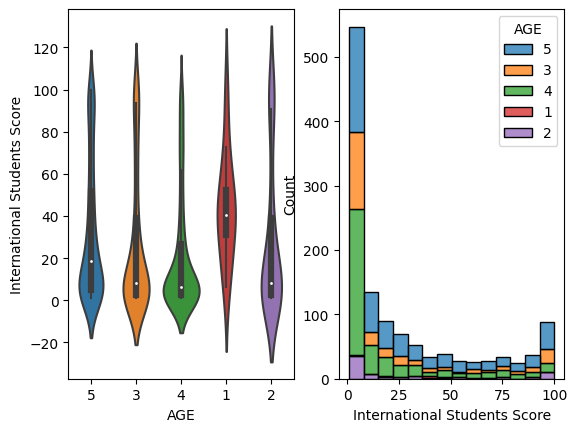

In [53]:
showvil("International Students Score","AGE")

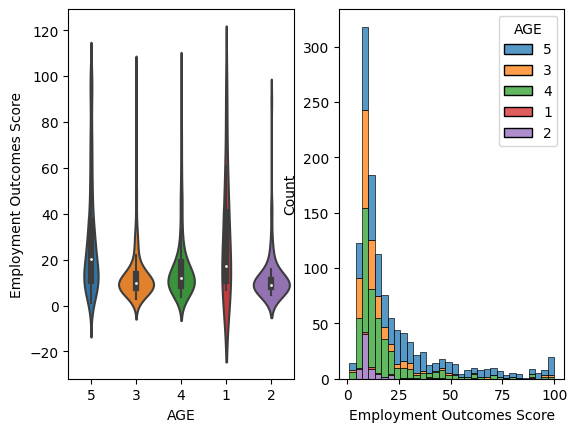

In [54]:
showvil("Employment Outcomes Score","AGE")

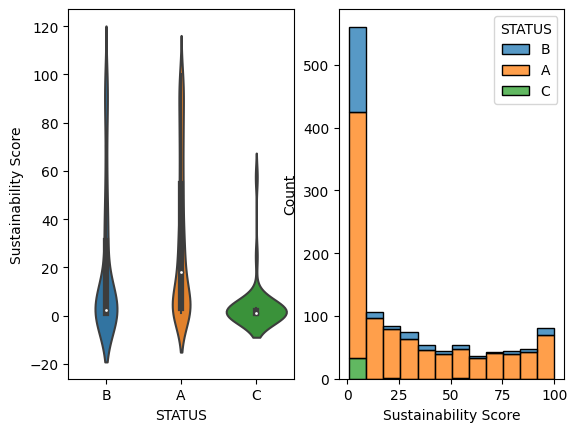

In [55]:
showvil("Sustainability Score","STATUS")

In [73]:
data.loc[data["Overall SCORE"]=="-"] = 0

for i in ["2024 RANK","2023 RANK","Overall SCORE"]:
    
    data[i] = data[i].astype("str")
    data[i] = LabelEncoder().fit_transform(data[[i]])

X = data[["2024 RANK","2023 RANK"]]

Y = data["Overall SCORE"]

Xtrain ,Xtest ,Ytrain, Ytest = train_test_split(X,Y,test_size=0.2)

model = KNeighborsClassifier()

model.fit(Xtrain,Ytrain)

prediction=model.predict(Xtest)

loss = mean_absolute_error(Ytest,prediction)

accu = accuracy_score(Ytest,prediction)

loss,accu

C:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\polat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(51.81707317073171, 0.5894308943089431)